# **TripAdvisor Hotel Reviews**

## Importation des bibliothéques

In [0]:
import pandas as pd
from nltk.tag import UnigramTagger
from nltk.corpus import treebank
import nltk
import re
import matplotlib.pyplot as plt

replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns): 
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s) 
        return s

replacer=RegexpReplacer()
replacer.replace("Don't hesistate to ask questions")

from sklearn.model_selection import train_test_split

import math
import random
from collections import defaultdict
from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
import re
import string
from sklearn.metrics import mean_squared_error
import nltk

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import sentiwordnet as swn
from bs4 import BeautifulSoup             
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
import random


In [0]:
import nltk
nltk.download('treebank')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Importation du dataset

In [0]:
#file_id='1DiCkP6qwCxIPK2TuK47US_QTVEminv5T'
#link='https://drive.google.com/uc?export=download&id={FILE_ID}'
#csv_url=link.format(FILE_ID=file_id)

#original_dataset = pd.read_csv(csv_url, sep=';', index_col='Unnamed: 0')

column_names = ['reviews.rating','reviews.text']
original_dataset = pd.read_csv('http://christophe-rodrigues.fr/eval_reviews.csv', usecols=column_names, sep=";")



In [0]:
original_dataset.head()

,reviews.rating,reviews.text
0,3,"This hotel was nice and quiet. Did not know, t..."
1,4,We stayed in the king suite with the separatio...
2,3,"Parking was horrible, somebody ran into my ren..."
3,5,Not cheap but excellent location. Price is som...
4,2,If you get the room that they advertised on th...


In [0]:
#Dimension du dataset
original_dataset.shape

(10000, 2)

In [0]:
original_dataset.describe()

,reviews.rating
count,10000.000000
mean,4.084100
std,1.152371
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


Regardons le nombre de valeurs manquantes

In [0]:
original_dataset.isna().sum()

reviews.rating    0
reviews.text      0
dtype: int64

##### Supprimons tous les MoreMore

In [0]:
original_dataset = original_dataset[original_dataset['reviews.text']!='MoreMore']

In [0]:
original_dataset.shape

(9982, 2)

### Regardons la distribution des différentes notes

In [0]:
original_dataset['reviews.rating'].value_counts()

5    4837
4    2844
3    1184
1     564
2     553
Name: reviews.rating, dtype: int64

On peut voir que la répartition est déséquilibrée et qu'il y a une très grosse partie de 5 contrairement à la note 1 et 2. Les avis sont donc positifs dans la majorité


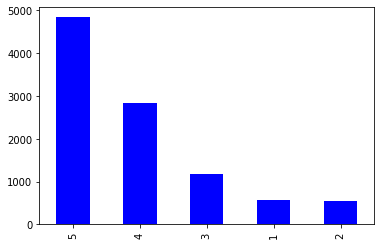

In [0]:
original_dataset['reviews.rating'].value_counts().plot.bar(color='blue')

### Fonction de preprocessing pour les reviews. Nous allons passer par les differentes etapes afin de nettoyer de la meilleure maniere les reviews.
- Convert the text to lowercase
- Removing Numbers
- Removing white spaces
- Replacer replace
- Tokenize into sentences
- Tokenize into words
- Remove stop words
- Lemmatize




In [0]:
 
def preprocess_text(test):

    #Convert the text to lowercase
    test = test.lower()

    #Removing Numbers
    test=re.sub(r'\d+','',test)


    
    #Removing white spaces
    test=test.strip()
    
    #Replacer replace
    text_replaced = replacer.replace(test)
    

    
    #Tokenize
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(text_replaced)

    #Tokenize words
    from nltk.tokenize import RegexpTokenizer
    tokenizer=RegexpTokenizer("[\w]+")

    for i in range(len(sentences)):
        sentences[i] = tokenizer.tokenize(sentences[i])

    #Remove stop words

    from nltk.corpus import stopwords
    stops=set(stopwords.words('english'))

    for i in range(len(sentences)):
        sentences[i] = [word for word in sentences[i] if word not in stops]

    #Lemmatize

    from nltk.stem import WordNetLemmatizer
    lemmatizer_output=WordNetLemmatizer()

    for i in range(len(sentences)):
        for j in range(len(sentences[i])):
            sentences[i][j] = lemmatizer_output.lemmatize(sentences[i][j])


    #Join the words back into a sentence.
    a=[' '.join(s) for s in sentences]
    b=['. '.join(a)]

    return b 


#### Appliquons cette fonction sur les reviews

In [0]:
review_clean = [preprocess_text(doc) for doc in original_dataset['reviews.text']]
sentences = [' '.join(r) for r in review_clean]


Création d'une colonne avec les reviews nettoyés

In [0]:
original_dataset['text_cleaned']=sentences
original_dataset.head()

,reviews.rating,reviews.text,text_cleaned
0,3,"This hotel was nice and quiet. Did not know, t...",hotel nice quiet. know train track near. train...
1,4,We stayed in the king suite with the separatio...,stayed king suite separation bedroom living sp...
2,3,"Parking was horrible, somebody ran into my ren...",parking horrible somebody ran rental car stayi...
3,5,Not cheap but excellent location. Price is som...,cheap excellent location. price somewhat stand...
4,2,If you get the room that they advertised on th...,get room advertised website paid may lucky sta...


### Nous allons faire une copie du dataset dans le but d'essayer une premiere approche binaire


In [0]:
dataset = original_dataset.copy()

### Nous appliquons le principe suivant pour pouvoir avoir un modele binaire 
- Si la note est inferieure à 3 alors la note devient 0
- Autrement la note devient 1

In [0]:
dataset[dataset['reviews.rating'] != 3]
dataset['labels'] = np.where(dataset['reviews.rating'] > 2, 1, 0)

In [0]:
dataset.head()

,reviews.rating,reviews.text,text_cleaned,labels
0,3,"This hotel was nice and quiet. Did not know, t...",hotel nice quiet. know train track near. train...,1
1,4,We stayed in the king suite with the separatio...,stayed king suite separation bedroom living sp...,1
2,3,"Parking was horrible, somebody ran into my ren...",parking horrible somebody ran rental car stayi...,1
3,5,Not cheap but excellent location. Price is som...,cheap excellent location. price somewhat stand...,1
4,2,If you get the room that they advertised on th...,get room advertised website paid may lucky sta...,0


## Regardons la répartition des notes

In [0]:
dataset['labels'].value_counts()

1    8865
0    1117
Name: labels, dtype: int64

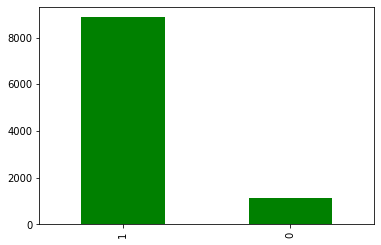

In [0]:
dataset['labels'].value_counts().plot.bar(color='green')

###### Nous allons donc utilisé un modele de classification pour prédire la classe 0 ou 1

*Nous allons split le dataset en training et test*

In [0]:
from sklearn.model_selection import train_test_split

X = dataset.text_cleaned
y = dataset.labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=15000, binary=True)

X_train_vect = vectorizer.fit_transform(X_train)

In [0]:
#Utilisation de smote pour les dataset déséquilibrés
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [0]:
X_test_vect = vectorizer.transform(X_test)

#### Utilisation du modele Naive bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

y_pred = nb.predict(X_test_vect)

In [0]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 92.74%


Faisons quelques tests sur differentes phrases

In [0]:
print(nb.predict(vectorizer.transform(['this hotel was amazing'])))

[1]


In [0]:
print(nb.predict(vectorizer.transform(['This hotel was a fucking joke, have you ever seen a housekipper that doesn\'t clean room? '])))

[0]


Cependant nous voulons prédire les notes et non une classe binaire.

Apres avoir tester un modele binaire nous allons complexifier cela en passant avec les vrai notes et non les labels binaire

In [0]:
original_dataset.head()

,reviews.rating,reviews.text,text_cleaned
0,3,"This hotel was nice and quiet. Did not know, t...",hotel nice quiet. know train track near. train...
1,4,We stayed in the king suite with the separatio...,stayed king suite separation bedroom living sp...
2,3,"Parking was horrible, somebody ran into my ren...",parking horrible somebody ran rental car stayi...
3,5,Not cheap but excellent location. Price is som...,cheap excellent location. price somewhat stand...
4,2,If you get the room that they advertised on th...,get room advertised website paid may lucky sta...


In [0]:
x1 = original_dataset['text_cleaned']
y1 = original_dataset['reviews.rating']

Nous allons creer un vectorizer pour split le text en unigram et bigrams

In [0]:
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)

### Nous allons split le dataset 

In [0]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_vect1, y1, test_size=0.15, random_state = 10, shuffle=True)

### Linear SVM pour une classification multiclasse

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lin_svc_mod = LinearSVC(C=0.13, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
lin_svc_mod.fit(x_train_c, y_train_c)
pred = lin_svc_mod.predict(x_test_c)
print("Linear SVC:",accuracy_score(y_test_c, pred))
print("MSE: ",mean_squared_error(y_test_c,pred))


Linear SVC: 0.5961281708945261
MSE:  1.0580774365821095


In [0]:
print(lin_svc_mod.predict(vect.transform(['this hotel was horrible'])))


[1]


Prenons une phrase d'une review qui n'apparait pas dans le dataset et qui a également été noté sur TipAdvisor

In [0]:
print("Score supposé : 4")
print("Score predit : ")
print(lin_svc_mod.predict(vect.transform(['loved 	stayed warwick overnight getway enjoy christmas shopping 	warwick exceeded expectations 	staff wonderful extrememly friendly room clean service lounge wonderful 	came contact hotel friendly 	women bathroom lever lounge well.. think haunted totally creepy vibe lights anywho 	really enjoyed stay going couple days 	 '])))


Score supposé : 4
Score predit : 
[5]


On s'approche de la classe désiré, en effet notre modéle a une précision de 60%.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train_c, y_train_c)
predrmfr = rmfr.predict(x_test_c)
print("Score:",round(accuracy_score(y_test_c,predrmfr)*100,2))
print("MSE: ",mean_squared_error(y_test_c,predrmfr))


Score: 53.67
MSE:  1.341789052069426


Faisons un grid search pour savoir quelle sont les meilleurs parametres

In [0]:

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,64]
    
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rmfr,parameters,cv=5)
cv.fit(x_train_c, y_train_c)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [0]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [0]:
display(cv)


Best parameters are: {'max_depth': 64, 'n_estimators': 10}


0.483 + or -0.001 for the {'max_depth': 2, 'n_estimators': 5}
0.483 + or -0.0 for the {'max_depth': 2, 'n_estimators': 10}
0.483 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.483 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.483 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.483 + or -0.001 for the {'max_depth': 4, 'n_estimators': 5}
0.483 + or -0.0 for the {'max_depth': 4, 'n_estimators': 10}
0.483 + or -0.0 for the {'max_depth': 4, 'n_estimators': 50}
0.483 + or -0.0 for the {'max_depth': 4, 'n_estimators': 100}
0.483 + or -0.0 for the {'max_depth': 4, 'n_estimators': 250}
0.483 + or -0.002 for the {'max_depth': 8, 'n_estimators': 5}
0.483 + or -0.001 for the {'max_depth': 8, 'n_estimators': 10}
0.483 + or -0.0 for the {'max_depth': 8, 'n_estimators': 50}
0.483 + or -0.0 for the {'max_depth': 8, 'n_estimators': 100}
0.483 + or -0.0 for the {'max_depth': 8, 'n_estimators': 250}
0.49 + or -0.

On relance notre modele avec les paramateres du grid search

In [0]:
from sklearn.ensemble import RandomForestClassifier
rmfrclass = RandomForestClassifier(max_depth = 64,n_estimators = 10 )
rmfrclass.fit(x_train_c, y_train_c)
predrmfrclass = rmfrclass.predict(x_test_c)
print("Score:",round(accuracy_score(y_test_c,predrmfrclass)*100,2))
print("MSE: ",mean_squared_error(y_test_c,predrmfrclass))

Score: 51.8
MSE:  1.6421895861148197


#### Support Vector Machine

In [0]:

from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train_c,y_train_c)
predsvm = svm.predict(x_test_c)
print("Score:",round(accuracy_score(y_test_c,predsvm)*100,2))
print("MSE: ",mean_squared_error(y_test_c,predsvm))

Score: 49.6
MSE:  2.0493991989319094


## Regression lineaire

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_c,y_train_c)
print("Score: ", reg.score(x_test_c, y_test_c))
pred_lin_reg = reg.predict(x_test_c)
print("MSE: ",mean_squared_error(y_test_c,pred_lin_reg))

Score:  0.596444694252513
MSE:  0.5117956954363189


In [0]:
#Supposé 2
print(reg.predict(vect.transform([' 	1st time seattle delayed anniversary trip wanted stay nicer hotels room reminded holiday inn level hotel 	plain room extra pillows 	bathroom ordinary corian sink ordinary bathroom 	room higher floor looking freeway loud 	reason earplugs sleep cd 	asked switch rooms told probably stay way stay 2 nights staying hotel different area town 	luggage room decided eat 	stopped concierge asked good place walk rudely told just walk area 	not sure concierge doorman just sitting desk expected help 	decided night hotel come day earlier happily said 	used club points crowne rooms maybe lousy experience opted leave pay room luxury hotel hotel 1000'])))

[2.60503475]


In [0]:
#from sklearn import datasets,linear_model
#from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf')}
#svc=linear_model.ARDRegression(n_iter=300,tol=0.001)
#clf = GridSearchCV(svc, parameters, cv=5)
#clf

## Resume des differents modele de machine learning

#### Le linear SVC a la meilleure precision mais la regression lineaire nous donne le plus petit mse

# Improve the model with Deep Learning

In [0]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import LSTM
import keras.backend as K

import nltk
nltk.download('treebank')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Using TensorFlow backend.


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Preprocessing

In [0]:
def create_dataset(num_words, max_text_len, data):
  res = []
  for i in tqdm(range(len(data))):
    res.append([preprocess_text(data.iloc[i]["reviews.text"]), data.iloc[i]["reviews.rating"]])
  inp, targ = zip(*res)
  print("Tokenizing the data ...")
  tokenizer = keras.preprocessing.text.Tokenizer(num_words = num_words)
  tokenizer.fit_on_texts([i[0] for i in inp])
  tensor = [ tokenizer.texts_to_sequences(i)[0] for i in inp]
  tensor = keras.preprocessing.sequence.pad_sequences(tensor, padding='post',   value=0, maxlen=max_text_len)
  print("Splitting the data into train/val datasets (0.2) ...")
  input_tensor_train, input_tensor_test, target_tensor_train, target_tensor_test = train_test_split(tensor, targ, test_size=0.1)

  return (input_tensor_train, np.array(target_tensor_train)-1), (input_tensor_test, target_tensor_test),  tokenizer

## Hyperparams

In [0]:
vocab_size = 5000
embed_size = 300
max_text_len = 200
learning_rate = 0.001
batch_size = 128
n_epochs = 4

In [0]:
train_set, test_set, dictionary = create_dataset(vocab_size, max_text_len, original_dataset)

100%|██████████| 9982/9982 [00:17<00:00, 556.23it/s]


Tokenizing the data ...
Splitting the data into train/val datasets (0.2) ...


## Model

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape=(max_text_len,), mask_zero=True))
model.add(LSTM(512, return_sequences=True))
model.add(LSTM(512, return_sequences=True))
model.add(Lambda(lambda x : K.mean(x, axis=1)))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.2))
#model.add(Dense(50, activation="relu"))
model.add(Dense(5, activation="softmax"))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import tensorflow as tf

In [0]:
# Variable-length int sequences.
query_input = tf.keras.Input(shape=(max_text_len,), dtype='int32')

# Embedding lookup.
token_embedding = tf.keras.layers.Embedding(vocab_size, embed_size)
# Query embeddings of shape [batch_size, Tq, dimension].
query_embeddings = token_embedding(query_input)
# Value embeddings of shape [batch_size, Tv, dimension].
value_embeddings = token_embedding(query_input)

# CNN layer.
cnn_layer = tf.keras.layers.Conv1D(
    filters=100,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')
# Query encoding of shape [batch_size, Tq, filters].
query_seq_encoding = cnn_layer(query_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
value_seq_encoding = cnn_layer(value_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
query_value_attention_seq = tf.keras.layers.AdditiveAttention()(
    [query_seq_encoding, value_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    query_seq_encoding)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(
    query_value_attention_seq)

fcn1 = tf.keras.layers.Dense(256)(query_value_attention)
dropout1 = tf.keras.layers.Dropout(0.5)(fcn1)
fcn2 = tf.keras.layers.Dense(100)(dropout1)
dropout2 = tf.keras.layers.Dropout(0.2)(fcn2)

output = tf.keras.layers.Dense(5, activation="softmax")(dropout2)

model = tf.keras.Model(query_input, output)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 300)     1500000     input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 200, 100)     120100      embedding[0][0]                  
                                                                 embedding[1][0]                  
______________________________________________________________________________________________

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])

In [0]:
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_set[1])
                                               ,train_set[1])
model.fit(train_set[0], [train_set[1]], batch_size=batch_size, epochs = n_epochs, validation_split=0.25 )#,class_weight=dict(zip(np.unique(train_set[1]),cw)) )

Train on 6737 samples, validate on 2246 samples
Epoch 1/4
6737/6737 [==============================] - 25s 4ms/sample - loss: 1.2520 - acc: 0.4811 - val_loss: 1.0740 - val_acc: 0.5298
Epoch 2/4
6737/6737 [==============================] - 22s 3ms/sample - loss: 0.9344 - acc: 0.5877 - val_loss: 0.8996 - val_acc: 0.5988
Epoch 3/4
6737/6737 [==============================] - 22s 3ms/sample - loss: 0.7256 - acc: 0.6870 - val_loss: 0.9080 - val_acc: 0.6126
Epoch 4/4
6737/6737 [==============================] - 22s 3ms/sample - loss: 0.5725 - acc: 0.7613 - val_loss: 1.0282 - val_acc: 0.6224


In [0]:
 def evaluate(X_test):
  y_pred = np.argmax(model.predict(X_test[0]), axis=-1)+1
  y_pred = np.mean(np.equal(y_pred , X_test[1]))
  return y_pred

In [0]:
evaluate(test_set)

0.5935935935935935

## Evaluation du projet

In [0]:
from sklearn.metrics import mean_squared_error
import random

In [0]:
#here an example of the simplest possible model
#take reviews in input and return ratings 
def my_random_model(reviews):
  res = []
  for review in reviews:
      res.append(1+4*random.random()) #any real between [1;5]
  return pd.DataFrame(res)

eval_predicted = my_random_model(original_dataset['reviews.text'])
print(mean_squared_error(round(eval_predicted),original_dataset['reviews.rating']))

print("Meilleur MSE avec Linear Regression : ",mean_squared_error(y_test_c,pred_lin_reg))





4.0075135243438185
Meilleur MSE avec Linear Regression :  0.5117956954363189
